In [259]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed 
from numpy.random import randint 
import plotly.express as px
from plotly.subplots import make_subplots
from math import sqrt,exp,pi

In [260]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    factor= [np.exp(-2j*pi*k/N) for k in range(N//2)]
    return np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])
def fft2(img):
    M,N=img.shape
    f=np.asarray(img,dtype=float)
    F=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[i,:]=fft(f[i,:])
    for j in range(N):
        F[:,j]=fft(Int[:,j])
    return F    

In [267]:
def un_ifft(x):
    N = len(x)
    if N <= 1: return x
    even = un_ifft(x[0::2])
    odd =  un_ifft(x[1::2])
    factor= [np.exp(2j*pi*k/N) for k in range(N//2)]
    return  np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])
def ifft(x):
    return (1/x.size) * un_ifft(x)
def ifft2(img):
    M,N=img.shape
    if(M%2!=0):
        return IDFT_2D(img)
    F=np.asarray(img,dtype=complex)
    f=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[:,i]=ifft(F[:,i])
    for j in range(N):
        f[j,:]=ifft(Int[j,:])
    return f

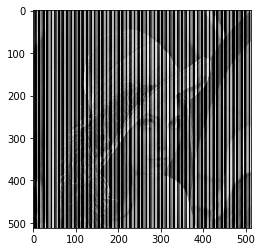

In [261]:
noisy=cv.imread('../images/noisy_lena.png',0)
# noisy=cv.cvtColor(noisy,cv.COLOR_BGR2RGB)
plt.imshow(noisy,cmap="gray")

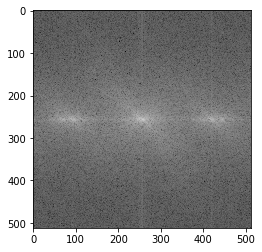

In [262]:
F = np.fft.fftshift(fft2(noisy))
magnitude_spectrum = 20*np.log(np.abs(F))
plt.imshow(magnitude_spectrum,cmap="gray")

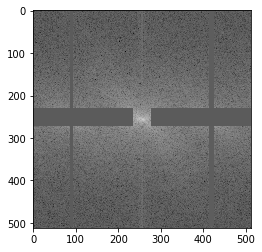

In [291]:
ms = np.copy(magnitude_spectrum)
# ms[239:272,32:140]= ms[257,162]
ms[0:507,88:95]=ms[52,138]
ms[0:507,414:424]=ms[82,366]
ms[230:272, :235] = ms[52,138]
ms[230:272, 278:] = ms[52,138]
plt.imshow(ms,cmap="gray")

In [292]:
# ms[239:272,366:473]= ms[258,328]

In [301]:
F_new = np.copy(F)
# F_new[239:272,32:140]= F_new[257,162]
# F_new[239:272,366:473]= F_new[258,328]
F_new[0:507,90]=F_new[52,138]
F_new[0:507,417]=F_new[52,138]
F_new[230:272, :235] = F_new[52,138]
F_new[230:272, 278:] = F_new[52,138]

In [302]:
f_new = ifft2(np.fft.ifftshift(F_new))

In [303]:
retr_img = np.abs(f_new).astype(np.uint8)

Text(0.5, 1.0, 'Retrieval Image')

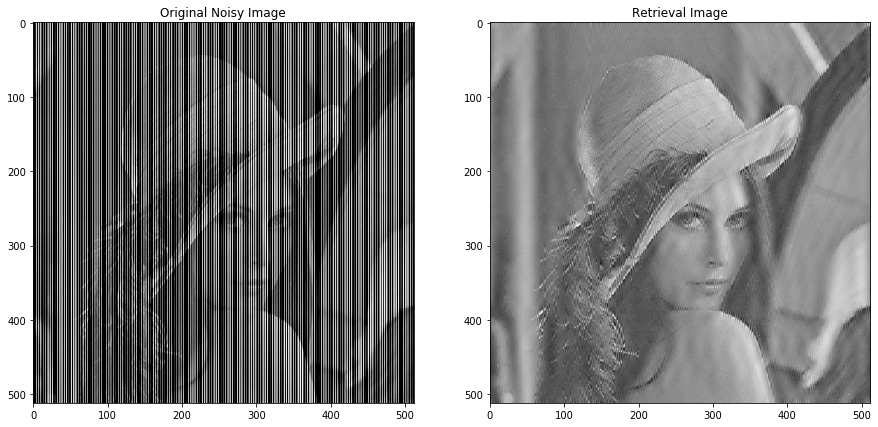

In [304]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(noisy,cmap="gray")
axarr[1].imshow(retr_img,cmap="gray")
axarr[0].set_title("Original Noisy Image")
axarr[1].set_title("Retrieval Image")

Text(0.5, 1.0, 'Retrieval Image Fourier Spectrum ')

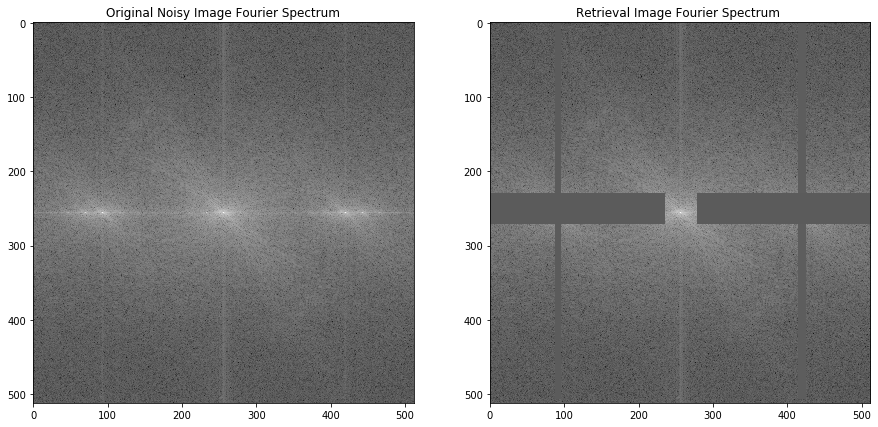

In [305]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(magnitude_spectrum,cmap="gray")
axarr[1].imshow(ms,cmap="gray")
axarr[0].set_title("Original Noisy Image Fourier Spectrum")
axarr[1].set_title("Retrieval Image Fourier Spectrum ")

### Process of removal of noise in the image : -
* The first thing we can observe from the spectrum of image is the presence of high frequency noise, which can be removed by using any low pass filter. 
* But to retain best information possible, we make the patch to high frequency components i.e. we reduce those magnitude to lower frequency components. To maintain the flow or spatial uniformity of the image , we patch those components with nearest low frequency component, the output can be seen in the above right image.
* The patches made follow spatial uniformity